In [25]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

In [26]:
n, p, t = 1000, 0.4, 10000  # n = número de ensayos, p = probabilidad de éxito, t = tamaño de la muestra

datos = np.random.binomial(n, p, t)

In [27]:
m, incompleto = np.unique(datos, return_counts=True)

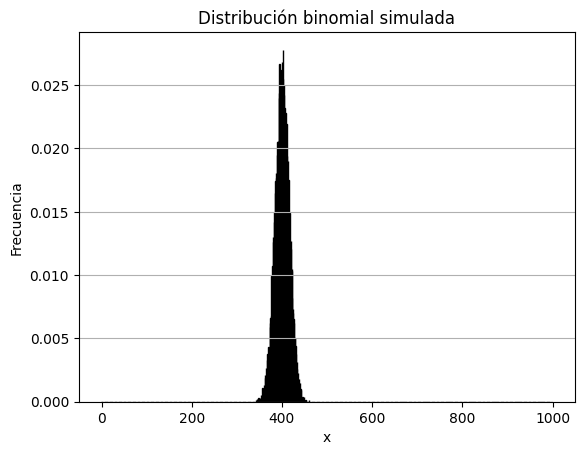

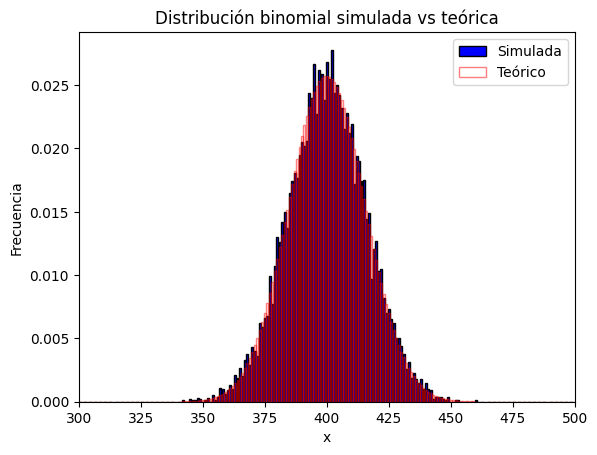

El valor de χ² es 0.012533468913649627 y el P-valor es 1.0


In [28]:
frec = np.zeros(n)
frec[m] = incompleto / np.sum(incompleto)  # Normalización

# Histograma de la distribución binomial simulada
#plt.hist(datos, color='blue', edgecolor='black', density=True)
x = np.arange(n)
plt.bar(x,frec, color='blue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.title('Distribución binomial simulada')
plt.show()

# Comparación con la distribución teórica binomial
teo = sp.binom.pmf(x, n, p)


plt.bar(x,frec, color='blue', edgecolor='black', label= 'Simulada')
plt.bar(x, teo, facecolor='none', edgecolor='red', label='Teórico',alpha=0.5)
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.legend()
plt.xlim(300, 500)
plt.title('Distribución binomial simulada vs teórica')
plt.show()

# Cálculo de chi para la binomial simulada
teocort = teo[300:500]
freccort = frec[300:500]
chifacil, pfacil = sp.chisquare(freccort, teocort)
print(f'El valor de χ² es {chifacil} y el P-valor es {pfacil}')



In [29]:
scale = datos.std()
print(scale)

15.657235904207358


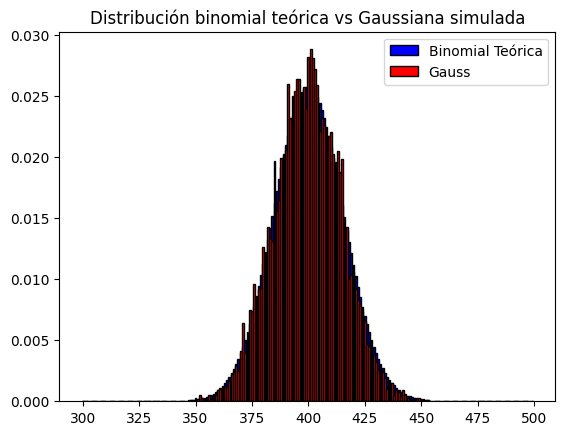

In [30]:
bins = np.arange(n+1)
sl = slice(300, 500)
tecort = teo[sl]
teocort_normalizado = teocort / np.sum(teocort) 

gauss = np.random.normal(loc=400, scale=15, size=10000)
gauss_discreto, _ = np.histogram(gauss, bins=bins, density=True)  # Discretizamos
    
# Corte para tener igual shape
gauss_cortado = gauss_discreto[sl]

# Normalización
gauss_cortado_normalizado = gauss_cortado / np.sum(gauss_cortado)  

plt.bar(bins[sl], teocort_normalizado, color='blue', edgecolor='black', label='Binomial Teórica')
plt.bar(bins[sl], gauss_cortado_normalizado, color='red', edgecolor='black', label='Gauss')
plt.legend()
plt.title('Distribución binomial teórica vs Gaussiana simulada')
plt.show()
#Me los guardo
l, k = sp.chisquare(gauss_cortado_normalizado, teocort_normalizado)


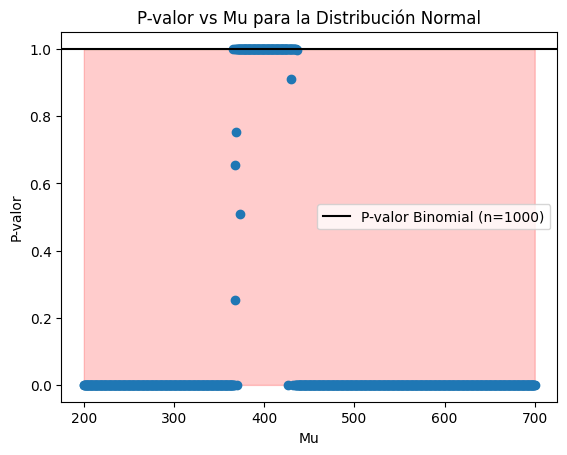

In [31]:
# Simulación de una distribución normal y comparación con la binomial teórica
k = 1000
mus = np.linspace(200, 700, k)
chig = np.zeros(k)
pg = np.zeros(k)
bins = np.arange(n+1)
teocort_normalizado = teocort / np.sum(teocort) 

for i,mu in enumerate(mus):

    gauss = np.random.normal(loc=mu, scale=15, size=1000)
    gauss_discreto, _ = np.histogram(gauss, bins=bins, density=True)  # Discretizamos
    
    # Corte para tener igual shape
    gauss_cortado = gauss_discreto[300:500]
    
    if np.sum(gauss_cortado) == 0:
        continue
    
    # Normalización
    gauss_cortado_normalizado = gauss_cortado / np.sum(gauss_cortado)  
    
    #Me los guardo
    l, k = sp.chisquare(gauss_cortado_normalizado, teocort_normalizado)
    chig[i] = l
    pg[i] = k


plt.plot(mus, pg, 'o')
plt.xlabel('Mu')
plt.ylabel('P-valor')
plt.axhline(pfacil, color='black', label=f'P-valor Binomial (n={n})')
plt.fill_between(mus, 0, pfacil, color='red', alpha=0.2)
plt.fill_between(mus, pfacil, 1, color='green', alpha=0.2)
plt.title('P-valor vs Mu para la Distribución Normal')
plt.legend()
plt.show()